In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy.fft import fftshift, ifftshift, fftn, ifftn

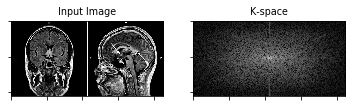

In [2]:
matplotlib.rcParams['font.size'] = 8.0
np.random.seed(19680801)

img = cv2.imread('C:\\Users\\Ghada\\Downloads\\Brain-MRI.png', 0)
dim = range(img.ndim)

k = fftshift(fftn(ifftshift(img, axes=dim), s=None, axes=dim), axes=dim)
k /= np.sqrt(np.prod(np.take(img.shape, dim)))
k = np.real(k)
magnitude_spectrum = 20 * np.log(np.abs(k) + 1)

images = []

fig, axs = plt.subplots(1, 2)

for j in range(2):
    axs[j].set_yticklabels([])
    axs[j].set_xticklabels([])

data = [img, magnitude_spectrum]

images.append(axs[0].imshow(data[0], cmap='gray'))
axs[0].set_title('Input Image')

images.append(axs[1].imshow(data[1], cmap='gray'))
axs[1].set_title('K-space')

plt.show()

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Mag_Field = np.random.randint(low= 1 , high= 100, size = 15)
print (Mag_Field)

[21 85 61  7 35 35 24 68 50 37 19 76 73 38 12]


In [5]:
larmorFreq_Hydrogen =42.58*Mag_Field
print(larmorFreq_Hydrogen)

[ 894.18 3619.3  2597.38  298.06 1490.3  1490.3  1021.92 2895.44 2129.
 1575.46  809.02 3236.08 3108.34 1618.04  510.96]


In [6]:
larmorFreq_Oxygen = 5.8*Mag_Field
print(larmorFreq_Oxygen)

[121.8 493.  353.8  40.6 203.  203.  139.2 394.4 290.  214.6 110.2 440.8
 423.4 220.4  69.6]


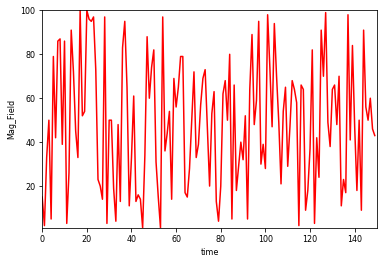

In [7]:
fig1 = plt.figure(2)
ax1 = plt.axes(xlim=(0,150 ), ylim=(1, 100))
line1, = ax1.plot([], [], lw=2)
ax1.set_xlabel("time")
ax1.set_ylabel("Mag_Field")
xline = np.arange(0, 150, 1)
yline = []
for d in range(len(xline)):
    yline.append(random.randint(1,100))
    
ax1.plot(xline, yline, 'red')

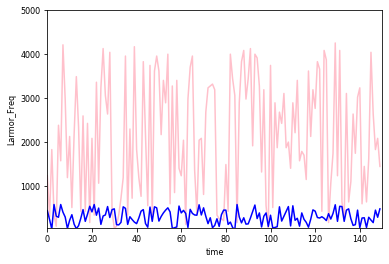

In [8]:
fig = plt.figure(2)
ax = plt.axes(xlim=(0,150 ), ylim=(50, 5000))
line, = ax.plot([], [], lw=2)
ax.set_xlabel("time")
ax.set_ylabel("Larmor_Freq")
xline = np.arange(0, 150, 1)
yline = []
yline1 = []
for d in range(len(xline)):
    larmorFreq_Hydrogen = 42.58*random.randint(1,100)
    larmorFreq_Oxygen = 5.8*random.randint(1,100)
    yline.append(larmorFreq_Hydrogen)
    yline1.append(larmorFreq_Oxygen)
    
ax.plot(xline, yline, 'pink')
ax.plot(xline, yline1, 'blue')

[2896.8 2982.  2087.4 2556.  3152.4  170.4 2172.6 1448.4 4132.2 2428.2
 4089.6   42.6 2726.4 3876.6   42.6  766.8 1022.4 1107.6 1065.  3024.6
 2598.6 1022.4 2428.2  852.  2598.6 4217.4 3195.  1831.8 3237.6 2044.8
 3152.4  170.4 3791.4 1661.4 1831.8  468.6 1533.6 3067.2 4047.  2215.2
 4004.4 3748.8 3450.6 3834.  4174.8  255.6  298.2 1448.4 1065.  1363.2
  383.4  127.8 4132.2 1235.4 2130.  2811.6 2982.  1065.  2470.8 2683.8
 3195.    42.6 2726.4 1065.  3280.2  255.6 3876.6  894.6 2257.8 1107.6
 1022.4  340.8  809.4 2726.4   42.6 2683.8 2769.  2428.2  255.6  809.4
 3493.2 3578.4 3493.2 2769.  1533.6  426.  3280.2 1618.8 2811.6 1576.2]


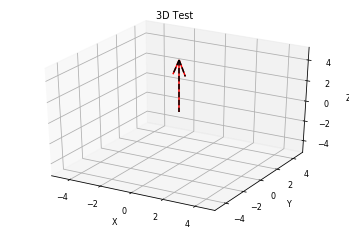

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


# function to create the rotation matrix
def rotMatrix(angle):
    c = np.cos(np.radians(angle))
    s = np.sin(np.radians(angle))
    return np.array([[c, -s], [s, c]])


flag = 0
random = []  # a list to store the nonuniform magnetic field


def data_gen(num):
    """Data generation"""

    global flag
    global random
    if num == 90 and flag == 0:
        flag = 1
    elif num == 180 and flag == 1:
        flag = 0

    z = num / 18

    if flag == 0 and not z == 10:
        ax.cla()
        ax.quiver(0, 0, 0, z, 0, (5 - z), pivot="tail", color="red")

    elif flag == 1 and not z == 10:
        z = z - 5
        v = np.array([0, (5 - z)])

        random = np.random.randint(1, 100, 90)
        v30 = rotMatrix(num * (random[num-90])).dot(v)
        ax.cla()
        ax.quiver(0, 0, 0, v30[0], v30[1], z, pivot="tail", color="red")

    ax.quiver(0, 0, 0, 0, 0, 5, pivot="tail", color="black",
              linestyle="dashed")

    ax.set_xlim3d([-5, 5])
    ax.set_xlabel('X')

    ax.set_ylim3d([-5, 5])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-5, 5])
    ax.set_zlabel('Z')

    ax.set_title('3D Test')


gyromag_ratio = 42.6  # gyromagnetic ratio for the Hydrogen atoms
r = np.random.randint(1, 100, 90)
print(r * gyromag_ratio)  # List of different angular frequencies in MHz

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data_gen(0)
ani = animation.FuncAnimation(fig, data_gen, 181, interval=1, blit=False)
# ani.save('animated_gif1.gif', writer=animation.PillowWriter(fps=30))
plt.show()